<a href="https://colab.research.google.com/github/abdusalam7474/Intrussion/blob/main/Copy_of_Iot_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'iot-dataset-for-intrusion-detection-systems-ids:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1303049%2F2260912%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240516%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240516T084010Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D825b93d19e6cec4aa066fc4a32ee06a5f65ea62f150958fa8a4eb8a3fae6ca7ba89339271de8a3ac66e7d34cfaf84ac507dae7ec919630ee8d4b704a1c4b39658e13d74b45e3df1ce6713a0938af45d3e226caffd51f8e60783dc01ce205b80f1aba7a66d9401dc1c2f718a75ecc1b3365b14a9dacf9c5f26f72d37a4fec4d1f5c97f63010643f91af77961a4095262341287cd25187371a85fee7932fad75c7feed01ae2042dd73dfb31335e6f2767402eae2193f8c1f6d70a65eb45856328d7581b232e0e67a99a9a498cd6c94044927ad890cacf5e99cd279d269c899e0b4407a6cb19c3839b46eb34f5045970cc5e9e0967bb2c54d95c7fe9745daa2c0c8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 550036975 bytes downloaded
Downloaded and uncompressed: iot-dataset-for-intrusion-detection-systems-ids
Data source import complete.


In [ ]:
#Importing all needed libraries

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.optimizers,keras.losses

In [ ]:
#reading our data
data=pd.read_csv("/kaggle/input/iot-dataset-for-intrusion-detection-systems-ids/BoTNeTIoT-L01-v2.csv")

In [ ]:
data.head(10)

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,0.000000e+00,98.000000,...,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,1.348699e-06,138.592929,...,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,0.000000e+00,114.856432,...,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,0.000000e+00,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
5,5.902539,80.383706,1.558026e+02,5.902539,80.383706,1.558026e+02,2.999997,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
6,613.818538,74.095096,2.659110e+00,613.818538,74.095096,2.659110e+00,610.152839,74.0,3.814697e-06,95.268043,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
7,614.778927,74.094941,2.654800e+00,614.778927,74.094941,2.654800e+00,611.113465,74.0,3.814697e-06,95.268043,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
8,615.618170,74.094787,2.650502e+00,615.618170,74.094787,2.650502e+00,611.953666,74.0,3.568323e-06,95.268043,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
9,616.596022,74.094633,2.646218e+00,616.596022,74.094633,2.646218e+00,612.931650,74.0,3.693565e-06,95.268043,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0


## let us explore the attack types, subtypes and devices

In [ ]:
# Here we get the names of columns with
# strings in their data
cols = []
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts()) <=10:
        cols.append(i)
print(cols)

['Device_Name', 'Attack', 'Attack_subType']


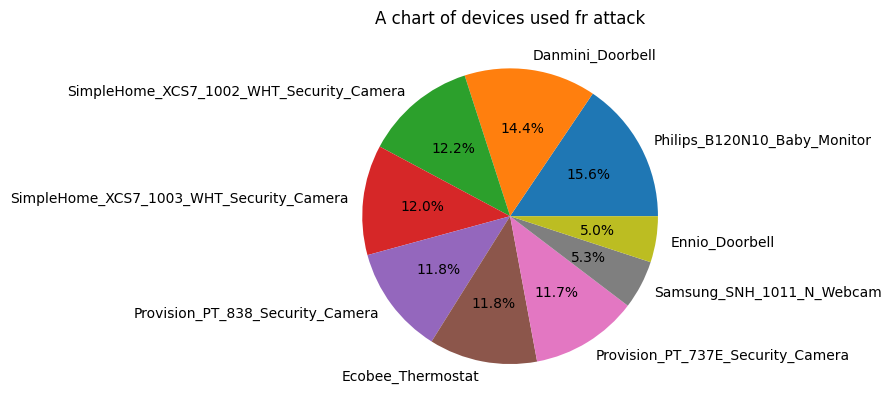

In [ ]:
# We plot pie chart for devices
val=data['Device_Name'].value_counts().values
index=data['Device_Name'].value_counts().index
plt.pie(val,labels=index,autopct='%1.1f%%')
plt.title(f'A chart of devices used fr attack')
plt.show()

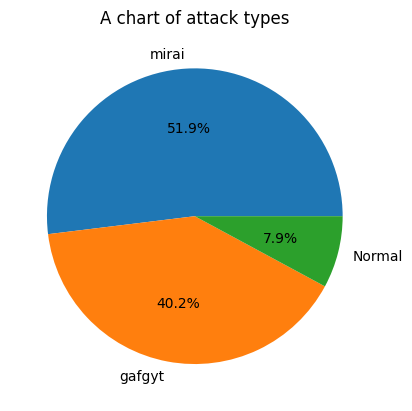

In [ ]:
# We plot pie chart for attacks
val=data['Attack'].value_counts().values
index=data['Attack'].value_counts().index
plt.pie(val,labels=index,autopct='%1.1f%%')
plt.title(f'A chart of attack types')
plt.show()

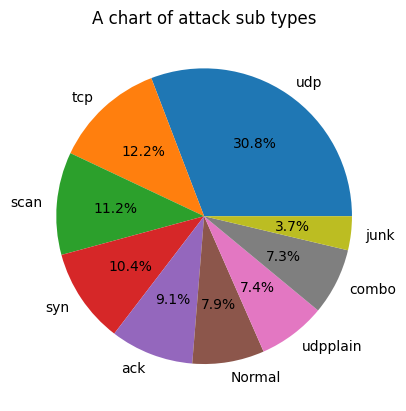

In [ ]:
# We plot pie chart for attack subtypes
val=data['Attack_subType'].value_counts().values
index=data['Attack_subType'].value_counts().index
plt.pie(val,labels=index,autopct='%1.1f%%')
plt.title(f'A chart of attack sub types')
plt.show()

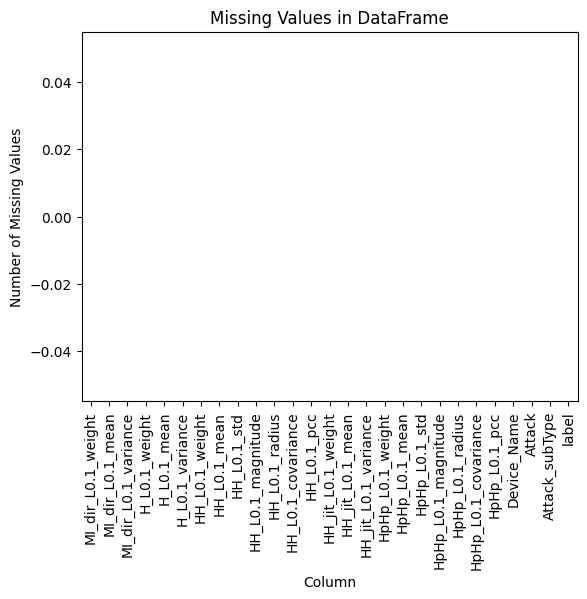

In [ ]:
#plotting missng values
#But we eventually see that their is no missing value

missing_values = data.isnull().sum()
missing_values.plot(kind='bar')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in DataFrame')
plt.show()

### Analyzing the correlations between all columns and the "label" column.

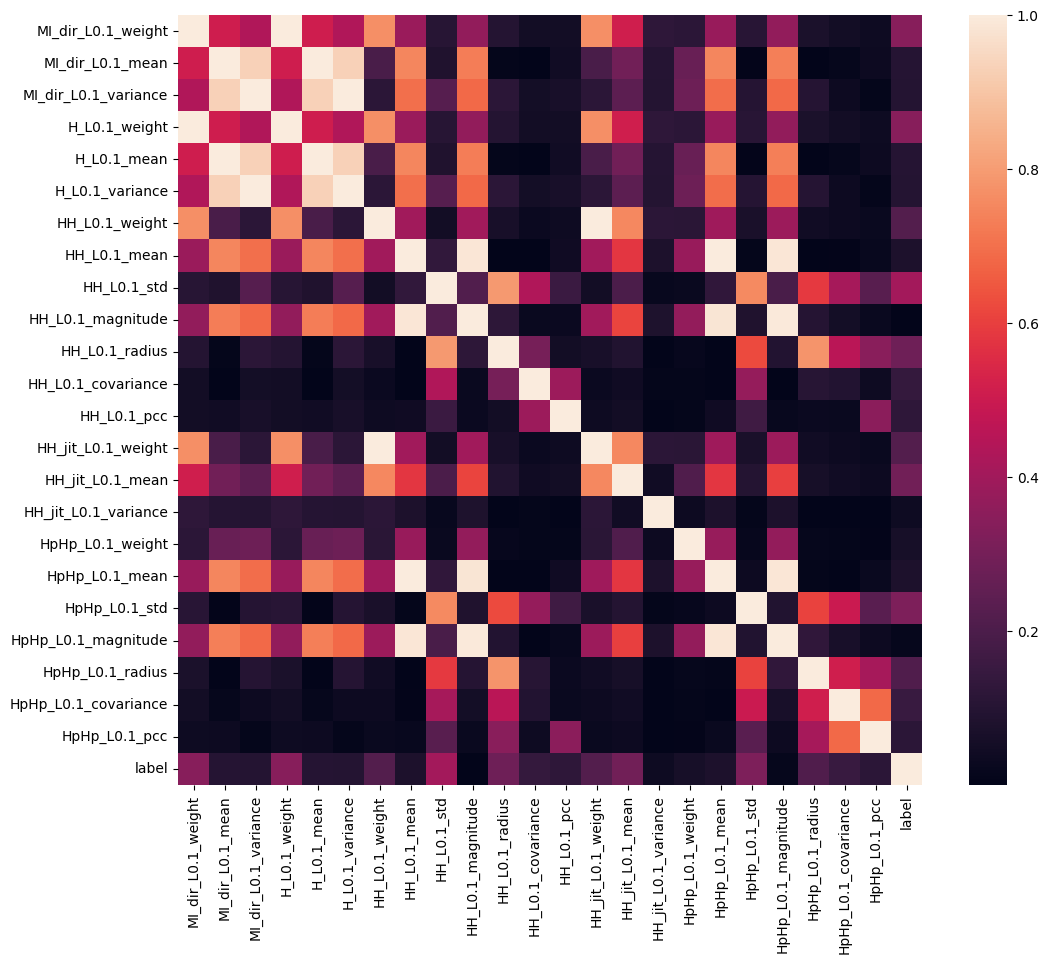

In [ ]:
import seaborn as sns
# we have to drop no numerical data columns
drop_col = ['Attack_subType', 'Attack', 'Device_Name']
data_n = data.copy()

data_n.drop(drop_col, axis=1, inplace=True) # dropping columns
#correlation_matrix = data_n.corr().abs()
correlation_matrix = data_n.corr().abs()

plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix)    # To see the correlations
plt.show()

In [ ]:

top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
"""
print("Top 10 Correlations:")
for index, value in top_correlations.items():
    col1, col2 = index
    if col1 != col2:  # Exclude self-correlations
        print(f"{col1} - {col2}: {value:.2f}")
attack_correlations = correlation_matrix['attack']
print(attack_correlations)
"""

'\nprint("Top 10 Correlations:")\nfor index, value in top_correlations.items():\n    col1, col2 = index\n    if col1 != col2:  # Exclude self-correlations\n        print(f"{col1} - {col2}: {value:.2f}")\nattack_correlations = correlation_matrix[\'attack\']\nprint(attack_correlations)\n'

In [ ]:
Label_correlations = correlation_matrix['label']
Label_correlations

MI_dir_L0.1_weight      0.341666
MI_dir_L0.1_mean        0.099261
MI_dir_L0.1_variance    0.095787
H_L0.1_weight           0.341666
H_L0.1_mean             0.099261
H_L0.1_variance         0.095782
HH_L0.1_weight          0.218093
HH_L0.1_mean            0.077773
HH_L0.1_std             0.403572
HH_L0.1_magnitude       0.003216
HH_L0.1_radius          0.282538
HH_L0.1_covariance      0.140852
HH_L0.1_pcc             0.121895
HH_jit_L0.1_weight      0.218093
HH_jit_L0.1_mean        0.292118
HH_jit_L0.1_variance    0.037067
HpHp_L0.1_weight        0.059576
HpHp_L0.1_mean          0.077855
HpHp_L0.1_std           0.319922
HpHp_L0.1_magnitude     0.014377
HpHp_L0.1_radius        0.208834
HpHp_L0.1_covariance    0.150097
HpHp_L0.1_pcc           0.115440
label                   1.000000
Name: label, dtype: float64

In [ ]:
threshold = 0.1  # Threshold value

# Filter columns with correlation less than the threshold
filtered_columns = Label_correlations[Label_correlations < threshold].index.tolist()

# Print the filtered columns
if filtered_columns:
  print("Columns with correlation less than", threshold, "are:")
  for col in filtered_columns:
    print(col)
else:
  print("No columns have correlation less than", threshold)

Columns with correlation less than 0.1 are:
MI_dir_L0.1_mean
MI_dir_L0.1_variance
H_L0.1_mean
H_L0.1_variance
HH_L0.1_mean
HH_L0.1_magnitude
HH_jit_L0.1_variance
HpHp_L0.1_weight
HpHp_L0.1_mean
HpHp_L0.1_magnitude


In [ ]:
#creating category mapping for the Attack_subtype column
#this is done because machine learning models requires
#numbers, so strings should be converted to some form of numberd.
un = data['Attack_subType'].unique()
uv = data['Attack'].unique()
category_mapping1 = {}
category_mapping2 = {}
for index, item in enumerate(un):
    category_mapping1[item] = index
print(f"mapping for attack subtypes: {category_mapping1}")

print("") #for space

for index, item in enumerate(uv):
    category_mapping2[item] = index
print(f"mapping for attack types: {category_mapping2}")

mapping for attack subtypes: {'combo': 0, 'junk': 1, 'scan': 2, 'tcp': 3, 'udp': 4, 'ack': 5, 'syn': 6, 'udpplain': 7, 'Normal': 8}

mapping for attack types: {'gafgyt': 0, 'mirai': 1, 'Normal': 2}


In [ ]:
data_nn = data.copy()
data_nn.drop(filtered_columns, axis=1, inplace=True) # dropping columns
data_nn.head()

,MI_dir_L0.1_weight,H_L0.1_weight,HH_L0.1_weight,HH_L0.1_std,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,1.000000,1.00000,0.000000e+00,0.000000e+00,0.0,0.0,1.00000,1.505914e+09,0.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,1.931640,1.93164,1.348699e-06,1.818989e-12,0.0,0.0,1.93164,7.263102e+08,0.000001,1.818989e-12,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,2.904273,1.00000,0.000000e+00,0.000000e+00,0.0,0.0,1.00000,1.505914e+09,0.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,3.902546,1.00000,0.000000e+00,0.000000e+00,0.0,0.0,1.00000,1.505914e+09,0.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,4.902545,2.00000,9.536743e-07,9.094947e-13,0.0,0.0,2.00000,7.529571e+08,0.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0


In [ ]:
#preparing the label encoder
lab=LabelEncoder()

# Training models on filtered data

In [ ]:
import joblib

In [ ]:
def evaluate_model(model_name, model):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    return pd.Series({'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'Recall': recall}), cm

In [ ]:
from tqdm import tqdm  # Import progress bar library

In [ ]:


X = data_nn.copy()
X.drop(['label','Device_Name'], axis=1, inplace=True) # dropping columns

# Apply the mapping using `replace`
X['Attack_subType'] = X['Attack_subType'].replace(category_mapping1)
X['Attack'] = X['Attack'].replace(category_mapping2)

#data_nn['Attack']=lab.fit_transform(data_nn['Attack'])
Y = data_nn['label']

In [ ]:
#Random train test split (At 80:20)
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:

batch_size = 256  # Adjust as needed

#this function helps to batch input and equally monitor progress of training

def train_model_in_batches(X_train, y_train, model, batch_size=None):
    """
    Trains an SVM model in batches with progress monitoring using tqdm.

    Args:
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        svm_model (SVC): SVM classifier instance.
        batch_size (int, optional): Batch size for training. Defaults to None (entire dataset).

    Returns:
        SVC: The trained SVM model.
    """

    if batch_size is None:
        batch_size = X_train.shape[0]  # Use entire dataset if no batch size specified

    # Create tqdm progress bar
    total_batches = int(np.ceil(X_train.shape[0] / batch_size))
    #pbar = tqdm(total=total_batches)
    with tqdm(total=total_batches, desc="Training SVM Model") as pbar:  # Use 'with' for automatic closing
      for i in range(0, X_train.shape[0], batch_size):
        # Select current batch
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        #print(f" batch-shape: {X_batch.shape}")

        # Train the model on the batch
        model.fit(X_batch, y_batch)

        pbar.update(1)  # Update progress bar

    pbar.close()  # Close progress bar

    return model

## Starting model training

In [ ]:
# Random forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
trained_rf = train_model_in_batches(x_train[:1280000], y_train[:1280000], rf, batch_size=batch_size)

Training SVM Model: 100%|██████████| 5000/5000 [14:20<00:00,  5.81it/s]


In [ ]:
print('Random forest score: ', trained_rf.score(x_test, y_test))

Random forest score:  0.9997890298345795


In [ ]:
res_rf, cm_rf = evaluate_model("rf_model", rf)
res_rf

Model       rf_model
Accuracy    0.999789
F1-Score    0.999789
Recall      0.999789
dtype: object

In [ ]:
joblib.dump(trained_rf, 'rf_model.pkl')

['rf_model.pkl']

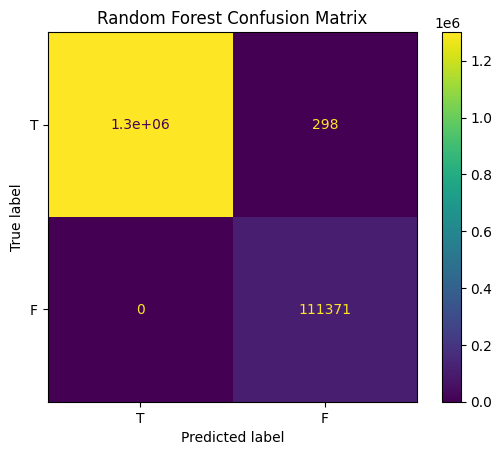

In [ ]:
class_labels = ["T","F"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_labels)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.savefig("Random Forest Confusion Matrix")
plt.show()

In [ ]:
# Support Vector machine
svm = SVC(C=1000,gamma='auto')
#svm.fit(x_train[:10000], y_train[:10000])
trained_svm = train_model_in_batches(x_train[:5120000], y_train[:5120000], svm, batch_size=batch_size)

Training SVM Model: 100%|██████████| 20000/20000 [02:41<00:00, 123.55it/s]


In [ ]:
print('Support Vector machine score: ', (trained_svm.score(x_test, y_test)))

Support Vector machine score:  0.9335613887783695


In [ ]:
res_svm, cm_svm = evaluate_model("svm_model", trained_svm)
res_svm

Model       svm_model
Accuracy     0.933561
F1-Score     0.910532
Recall       0.933561
dtype: object

In [ ]:
joblib.dump(trained_svm, 'svm_model.pkl')

['svm_model.pkl']

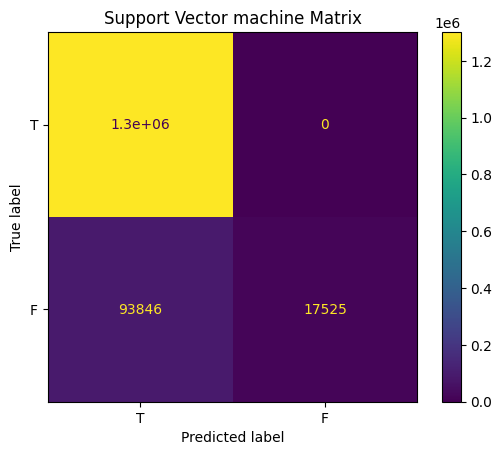

In [ ]:
class_labels = ["T","F"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_labels)
disp.plot()
plt.title("Support Vector machine Matrix")
plt.savefig("Support Vector machine Matrix")
plt.show()

In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
trained_dtree = train_model_in_batches(x_train[:5120000], y_train[:5120000], dtree, batch_size=batch_size)

Training SVM Model: 100%|██████████| 20000/20000 [00:55<00:00, 362.12it/s]


In [ ]:
print('Dtree', trained_dtree.score(x_test,y_test))

Dtree 1.0


In [ ]:
res_tree, cm_tree = evaluate_model("Decision tree", trained_dtree)
res_tree

Model       Decision tree
Accuracy              1.0
F1-Score              1.0
Recall                1.0
dtype: object

In [ ]:
joblib.dump(trained_dtree, 'dtree_model.pkl')

['dtree_model.pkl']

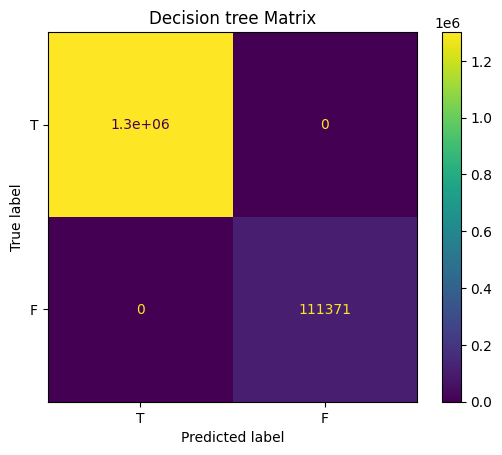

In [ ]:
class_labels = ["T","F"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=class_labels)
disp.plot()
plt.title("Decision tree Matrix")
plt.savefig("Decision tree Confusion Matrix")
plt.show()

# trying models on unfiltered data

In [ ]:
X = data.copy()
X.drop(['Attack','Device_Name'], axis=1, inplace=True) # dropping columns

# Apply the mapping using `replace`
X['Attack_subType'] = X['Attack_subType'].replace(category_mapping)

target = data.copy()
target['Attack']=lab.fit_transform(target['Attack'])
Y = target['Attack']

In [ ]:
#Random train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [ ]:
#
lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
print('The logistic regression: ', lr.score(x_test, y_test))

In [ ]:
#
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
print('The LGB', lgb.score(x_test, y_test))

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train)
print('Dtree ', tree.score(x_test,y_test))

# Saving moidel for reuse

In [ ]:
# Replace 'model.pkl' with the path to your saved model
loaded_model = joblib.load('rf_model.pkl')

In [ ]:
res_treet, cm_treje = evaluate_model("Decision tree", loaded_model)
res_treet

Model       Decision tree
Accuracy         0.999789
F1-Score         0.999789
Recall           0.999789
dtype: object